##### import library 

In [200]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



In [201]:
diabetes_df=pd.read_csv(r"G:\Classes\MachineLearning_TahlilDadeh\MachineLearning_Practice\Pima-Indians-Diabetes.csv",sep=",",encoding="UTF-8")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Exploration

In [202]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### preprocessing


##### Create Functions to check zero and calculate mean,median,mode

In [203]:
# function to check 0 in column
def chkColumnForVal(df,col_name,val):
    print (col_name)
    rowcnt=0
    out_array=[]
    for t in df[col_name]:
        if(t<val):
            out_array.append(rowcnt)
        rowcnt=rowcnt+1
    return len(out_array)

#function to find mean,median,mode
def cal_mmm(df,col_name): 
    mean = df[col_name].mean()
    mode = df[col_name].mode()
    #median = df[col_name].median
    mmm_array=[mean,mode]
    return mmm_array

In [204]:
diabetes_df['Glucose']=diabetes_df.Glucose.mask(diabetes_df.Glucose == 0,cal_mmm(diabetes_df,"Glucose")[0])
diabetes_df['BloodPressure']=diabetes_df.BloodPressure.mask(diabetes_df.BloodPressure == 0,cal_mmm(diabetes_df,"BloodPressure")[0])
diabetes_df['SkinThickness']=diabetes_df.SkinThickness.mask(diabetes_df.SkinThickness == 0,cal_mmm(diabetes_df,"SkinThickness")[0])
diabetes_df['Insulin']=diabetes_df.Insulin.mask(diabetes_df.Insulin == 0,cal_mmm(diabetes_df,"Insulin")[0])
diabetes_df['BMI']=diabetes_df.BMI.mask(diabetes_df.BMI == 0,cal_mmm(diabetes_df,"BMI")[0])


print(f"Number of zero in Glucose is > {sum(diabetes_df['Glucose']==0)}")
print(f"Number of zero in BloodPressure is > {sum(diabetes_df['BloodPressure']==0)}")
print(f"Number of zero in SkinThickness is > {sum(diabetes_df['SkinThickness']==0)}")
print(f"Number of zero in Insulin is > {sum(diabetes_df['Insulin']==0)}")
print(f"Number of zero in BMI is > {sum(diabetes_df['BMI']==0)}")



Number of zero in Glucose is > 0
Number of zero in BloodPressure is > 0
Number of zero in SkinThickness is > 0
Number of zero in Insulin is > 0
Number of zero in BMI is > 0


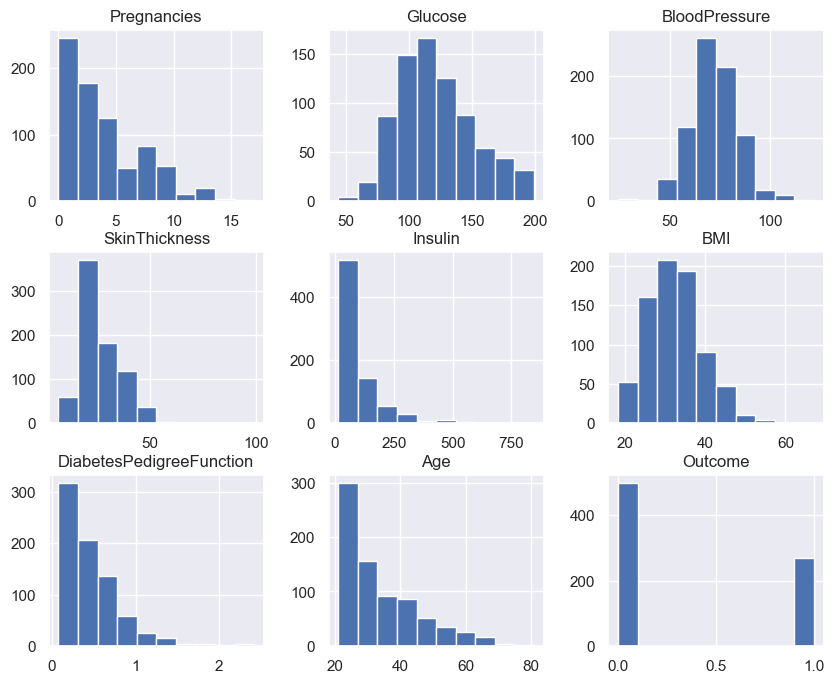

In [205]:
filt_df = diabetes_df[['SkinThickness','Insulin']]
#filt_df = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']]
#print(filt_df.head(10))
diabetes_df.hist(figsize=(10,8))
plt.show()

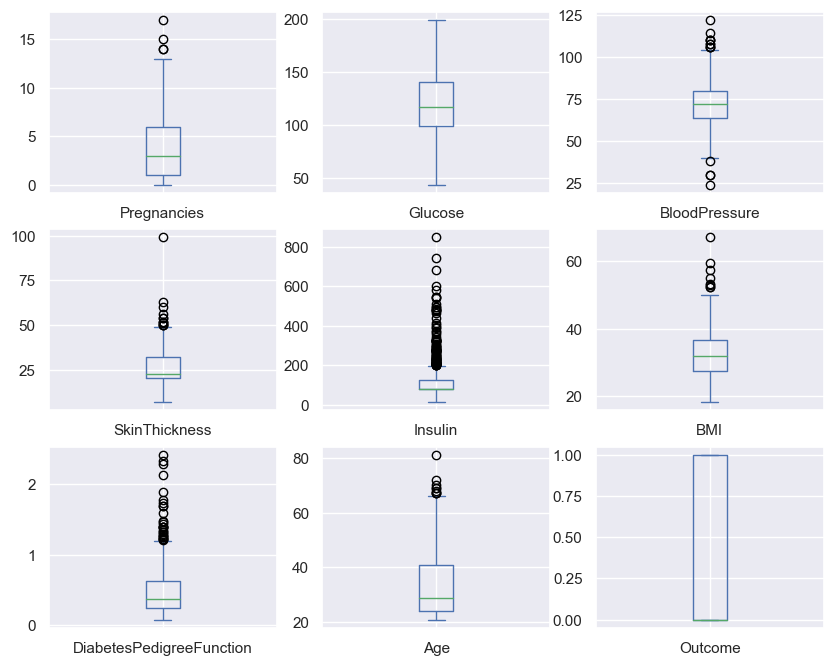

In [206]:
diabetes_df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))
plt.show()

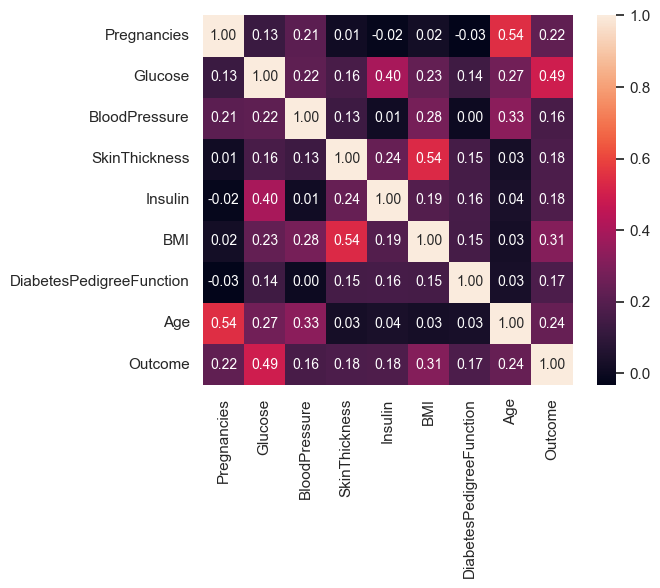

In [207]:
sns.set(style='whitegrid', context='notebook')
cols = diabetes_df.columns
cm = np.corrcoef(diabetes_df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 10},yticklabels=cols,xticklabels=cols)
plt.show()

##### Perceptron


Train data score: 0.75
Test data score: 0.75


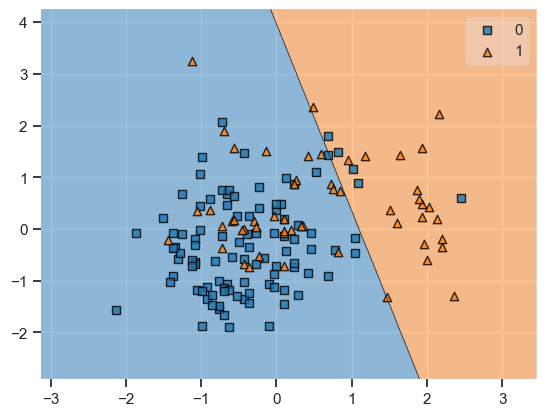

In [259]:

# Split the dataset into features and target
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Select the features you want to use

selected_features = ['Glucose', 'BMI']  
X = X[selected_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Scale the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = y_train.values
y_test = y_test.values

# Create and train the Perceptron model
ppn = Perceptron(random_state=1, tol=0.001, max_iter=1000)
ppn.fit(X_train, y_train)

# Plot the decision regions
plot_decision_regions(X_test, y_test.astype(int), clf=ppn)

# Evaluate the model
train_score = ppn.score(X_train, y_train)
test_score = ppn.score(X_test, y_test)

# Check the Score Result
print(f"Train data score: {train_score:.2f}")
print(f"Test data score: {test_score:.2f}")

##### logistic regression Model

Train data score: 0.77
Test data score: 0.76


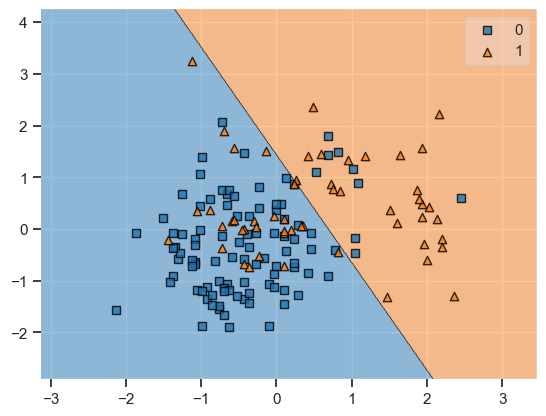

In [268]:

# Split the dataset into features and target
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Select the features you want to use

selected_features = ['Glucose', 'BMI']  
X = X[selected_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Scale the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = y_train.values
y_test = y_test.values

# Create and train the Perceptron model
lr=LogisticRegression(random_state=1,max_iter=1000,tol=0.00001)
lr.fit(X_train, y_train)

# Plot the decision regions
plot_decision_regions(X_test, y_test.astype(int), clf=lr)

# Evaluate the model
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

# Check the Score Result
print(f"Train data score: {train_score:.2f}")
print(f"Test data score: {test_score:.2f}")

##### SVM


Train data score: 0.77
Test data score: 0.76


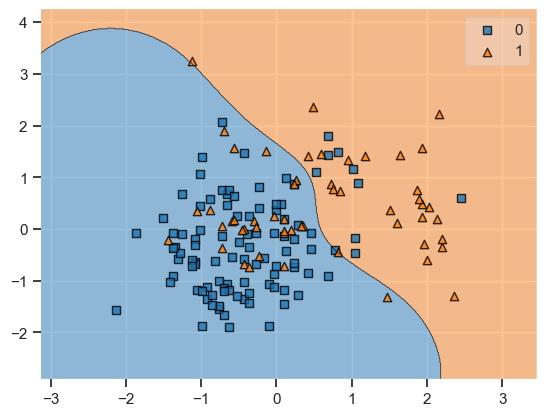

In [285]:

# Split the dataset into features and target
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Select the features you want to use
['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
selected_features = ['Glucose', 'BMI']  
X = X[selected_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Scale the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = y_train.values
y_test = y_test.values

# Create and train the Perceptron model

svm=SVC(kernel="rbf",random_state=1)
svm.fit(X_train, y_train)

# Plot the decision regions
plot_decision_regions(X_test, y_test.astype(int), clf=svm)

# Evaluate the model
train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test, y_test)

# Check the Score Result
print(f"Train data score: {train_score:.2f}")
print(f"Test data score: {test_score:.2f}")

c:\Users\ASI\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


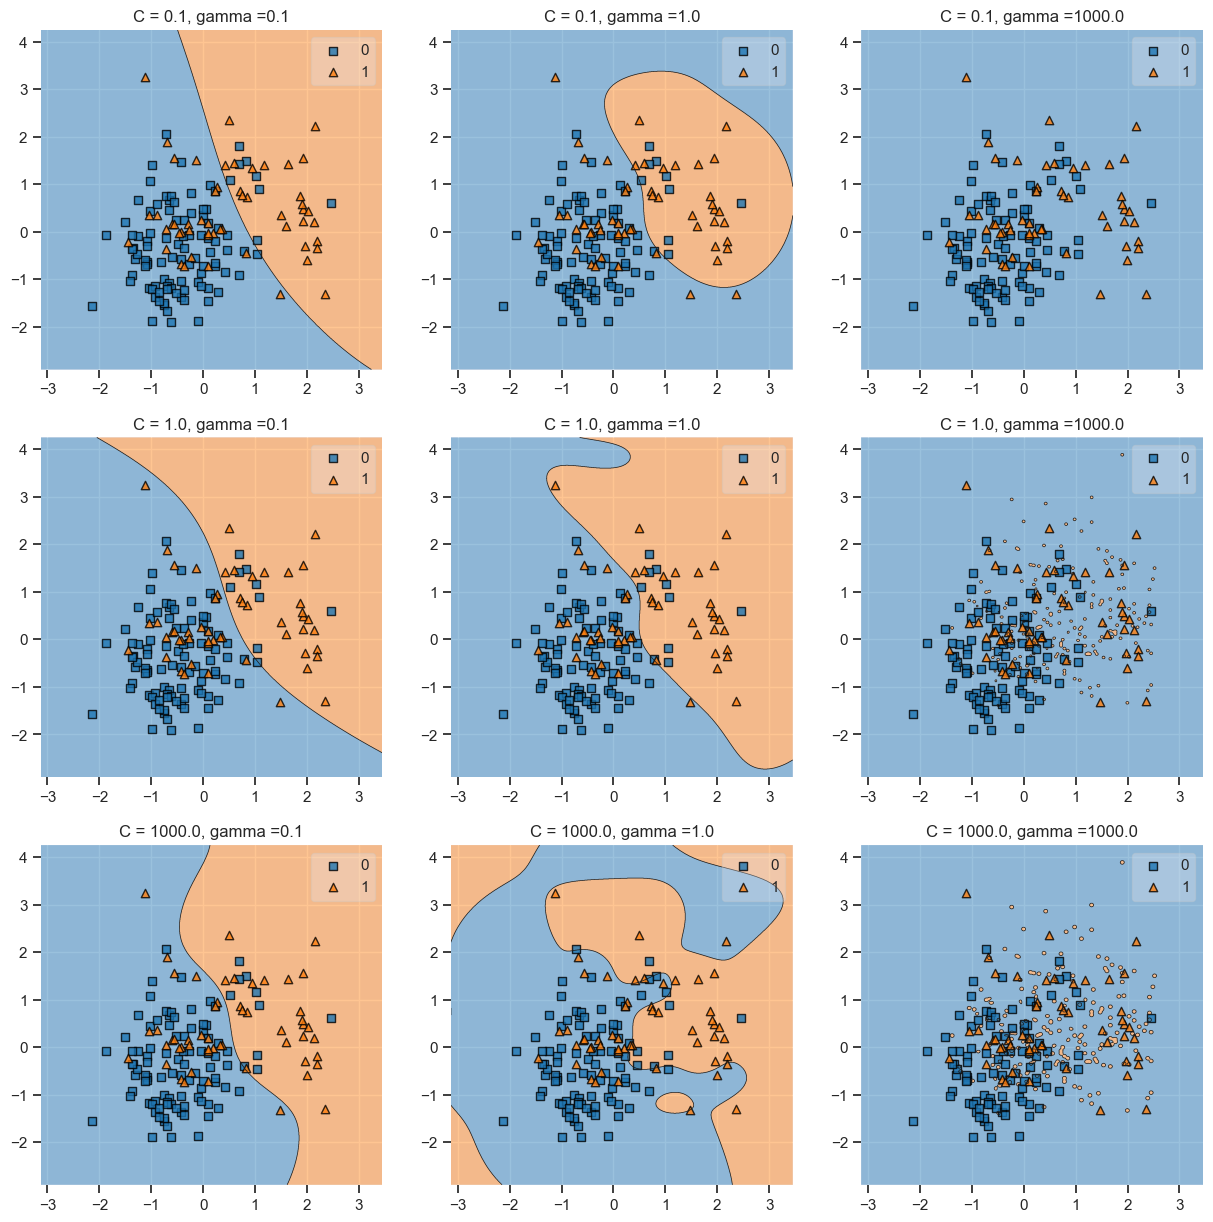

In [286]:
c=[0.1,1.0,1000.0]
gamma =[0.1,1.0,1000.0]
i=1
plt.figure(figsize=(15,15))

for c in c:
    for g in gamma:
        svm=SVC(kernel="rbf",random_state=30,gamma=g,C=c)
        svm.fit(X_train, y_train)
        y=y.astype(int)
        plt.subplot(3,3,i)
        plot_decision_regions(X_test, y_test.astype(int), clf=svm)
        plt.title(f"C = {c}, gamma ={g}")
        i+=1
        
plt.show()

